# Lab 2: Kernel regularized least-squares and early stopping

## Exercises:  (Name: Moses Mbabaali, Matricola: 4846019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import all the functions needed for this lab
from utils import *

### 0. Data loading and visualization

1. Load the 2 moons dataset using the `two_moons` function defined in `utils.py`. Since this dataset is 2D you can plot it using matplotlib with the following sample code:

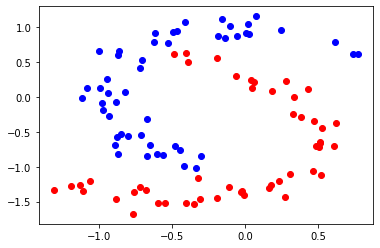

In [2]:
Xtr, Ytr, Xte, Yte = two_moons(pflip=0)
fig, ax = plt.subplots()
ax.scatter(Xtr[Ytr == +1, 0], Xtr[Ytr == +1, 1], color='r')
ax.scatter(Xtr[Ytr == -1, 0], Xtr[Ytr == -1, 1], color='b')

2. Explore the effect of the noise on the dataset: load the data again flipping some of the labels (change the `pflip` argument of the `two_moons` function). Check whether you can see the flipped labels in the plots of the data.

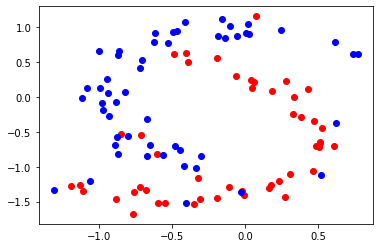

In [3]:
#TODO
Xtra, Ytra, Xtea, Ytea = two_moons(pflip=10)
fig, ax = plt.subplots()
ax.scatter(Xtra[Ytra == +1, 0], Xtra[Ytra == +1, 1], color='r')
ax.scatter(Xtra[Ytra == -1, 0], Xtra[Ytra == -1, 1], color='b')

In [14]:
#Xtra, Ytra, Xtea, Yte

200

3. What kind of effect do you expect on classification performance if you increase the label noise?

In [4]:
#TODO
#1. Basically when you increase label noise the classification problem is going to become much more harder. And that
# means that the classifier is going to work extra hard to pick out the hard points to classify. 
#2. Classifier performance is going to decrease in this case as well. Where you you have had say 98% the performance
#might drop to say 70% or less due the hard points to classify in the dataset. 

### 1. KRLS

Fix the amount of label noise to 10%.

1. Use the Gaussian kernel. Fix some values for the penalty, and for the length-scale. Fit a KRLS model to the training data, and calculate the classification error on the training and test data.

    **Hint:** You will have to use the `train_krls` function for training, `linear_predict` function to compute test predictions and `c_err` to calculate the error. Check the doc-strings at the top of the functions defined in this notebook for help on how to use them.
    Note that you can replace `Xte` with `Xtr` in `linear_predict` to compute predictions on the training data and then use `c_err` to compute the training error.

In [5]:
c = train_krls(Xtra, Ytra, lam=0.001, kernel='gaussian', kernel_args=1)
y =  linear_predict(c, Xtra,Xtea, kernel='gaussian', kernel_args=1)
c_err(Ytea,np.sign(y))
#np.sign(y)

0.19

2. Fix some value for the kernel length-scale. Explore the effect of regularization on classification performance: use the `plot_sep_func` function to visualize how the boundary between the class-labels changes as the regularization changes.

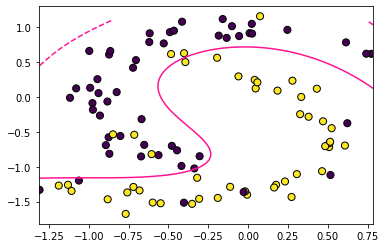

In [6]:
#TODO
#sigma=1
fig, ax = plt.subplots()
plot_sep_func(c, Xtra, Ytra, Xtea, 'gaussian',1,ax)

3. Fix some value for the regularization parameter. Explore the effect of changing the kernel length-scale: use the `plot_sep_func` function to visualize how the boundary between the class-labels changes.

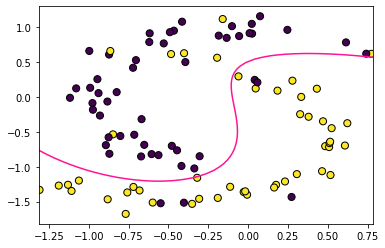

In [7]:
#TODO
Xtrb, Ytrb, Xteb, Yteb = two_moons(pflip=10)
cb = train_krls(Xtrb, Ytrb, lam=0.00001, kernel='gaussian', kernel_args=2)
yb =  linear_predict(cb, Xtrb,Xteb, kernel='gaussian', kernel_args=2)
#c_err(Ytea,np.sign(yb))
fig, ax = plt.subplots()
plot_sep_func(cb, Xtrb, Ytrb, Xteb, 'gaussian',2,ax)

4. **Plot how the training and test errors change versus the amount of regularization with kernel length-scale fixed to 0.5**, and comment on your findings.

Flip Value : 10


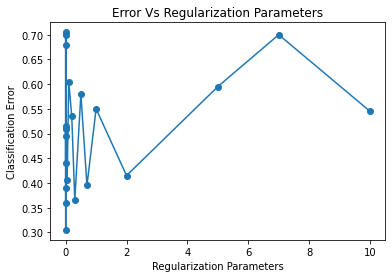

In [8]:
reg_pars = [10, 7, 5, 2, 1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
            0.01, 0.005 , 0.002 , 0.001 ,0.0005, 0.0002 , 0.0001 ,
            0.00001 , 0.000001]

def plot_error(flip):
    trainin_error = []
    print('Flip Value :',flip)
    for i in reg_pars:
        Xtrc, Ytrc, Xtec, Ytec = two_moons(pflip=flip)
        cc = train_krls(Xtrc, Ytrc, lam=i, kernel='gaussian', kernel_args=0.5)
        yc =  linear_predict(cb, Xtrc,Xtec, kernel='gaussian', kernel_args=0.5)
        trainin_error.append(c_err(Ytec,np.sign(yc)))    
    plt.plot(reg_pars,trainin_error)
    plt.scatter(reg_pars,trainin_error)
    plt.title("Error Vs Regularization Parameters")
    plt.xlabel('Regularization Parameters')
    plt.ylabel('Classification Error')
    plt.show()
    
plot_error(10)

In [9]:
#TODO
#1. The error rate is not constant. It keeps changing everytime the algorithm is run a different value will be got. 
#2. But where the value of regularization parameter is smaller then the error rate is much more stable than, 
#when its larger. 

5. Repeat the previous step with 5%, 20% and 50% of flipped labels. Explain the behavior of test and training errors.

Flip Value : 5


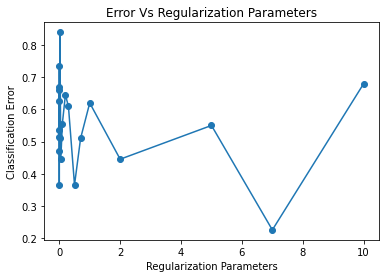

In [10]:
#TODO
plot_error(5)

Flip Value : 20


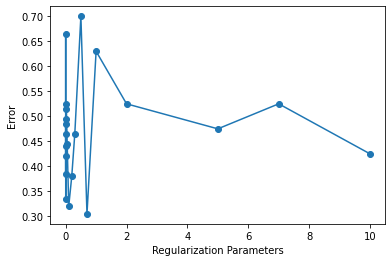

In [264]:
plot_error(20)

Flip Value : 50


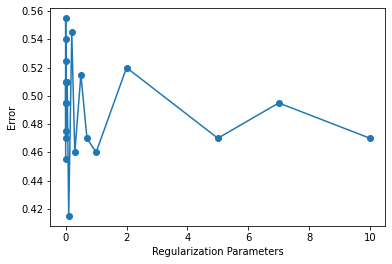

In [265]:
plot_error(50)

6. Fix `fplip=10`. Using the Gaussian and the Polynomial kernel, use **cross-validation** as in the previous lab to find the best values of
 - the kernel parameter (length-scale for the Gaussian kernel, exponent for the polynomial kernel)
 - the amount of regularization
 
     Plot the decision boundaries.

In [65]:
#TODO

kernels = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.5,2.75,3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75]
reg_pars = [10, 7, 5, 2, 1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
            0.01, 0.005 , 0.002 , 0.001 ,0.0005, 0.0002 , 0.0001 ,
            0.00001 , 0.000001]

def bestparg(kernel,flip):
    """ 
       kernel: takes in the kernel either guassian or polynomial 
       flip: amount of flip. 
    """
    print(kernel)
    tc_err = []
    kens = []
    regs = []
    Xtr, Ytr, Xte, Yte = two_moons(pflip=flip)
    for i in kernels:
        for j in reg_pars:
            cc = train_krls(Xtr, Ytr, lam=j, kernel=kernel, kernel_args=i)
            yc =  linear_predict(cc, Xtr,Xte, kernel=kernel, kernel_args=i)
            tc_err.append(c_err(Yte,np.sign(yc)))
            kens.append(i)
            regs.append(j)
    kernb = kens[tc_err.index(min(tc_err))]
    reg_par = regs[tc_err.index(min(tc_err))]
    ca = train_krls(Xtr, Ytr, lam=reg_par, kernel=kernel, kernel_args=kernb)
    print("Classification Error is:",min(tc_err),"-Best kernel:",kens[tc_err.index(min(tc_err))], "-Best reg_par:",regs[tc_err.index(min(tc_err))])
    fig, ax = plt.subplots()
    plot_sep_func(ca, Xtr, Ytr, Xte, kernel,kernb,ax)
    return kernb, reg_par

polynomial
Classification Error is: 0.145 -Best kernel: 5 -Best reg_par: 0.0002


(5, 0.0002)

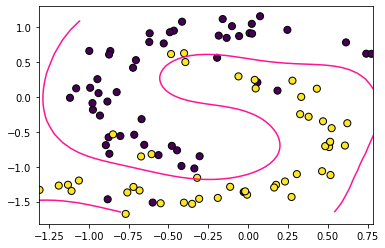

In [66]:
bestparg('polynomial',10)  #gaussian 'polynomial'

### 2. Kernel Least Squares with Early Stopping.

1. Use the Gaussian kernel. Fix some values for the number of iterations and the length-scale. Fit an iterative KLS model to the training data, calculating classification error on the test data.

2. Fix some value for the kernel length-scale (use the same value as in the previous exercise). Explore the effect of the number of iterations on classifiation performance using the `plot_sep_func`. Comment on how the boundary changes as the number of iterations changes.

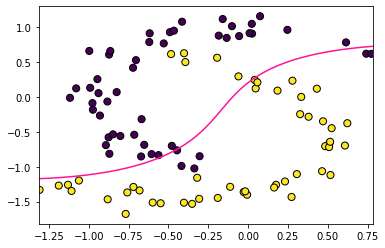

In [46]:
#TODO
Xtr, Ytr, Xte, Yte = two_moons(pflip=0)
ce=  train_kls_early_stop(Xtr, Ytr, t=10, kernel='gaussian', kernel_args=1)
ypred =  linear_predict(ce,Xtr,Xte, kernel= 'gaussian',kernel_args=1)
c_err(Yte,np.sign(ypred))
fig, ax = plt.subplots()

plot_sep_func(ce,Xtr, Ytr, Xte, 'gaussian',1,ax)

In [47]:
def func(kernel,flip):
    """ Takes in the 
        kernel: gaussian or polynomial 
        flip: percentage of flip
        
        """
    print('Kernel :',kernel)
    Xtr, Ytr, Xte, Yte = two_moons(pflip=flip)
    ce=  train_kls_early_stop(Xtr, Ytr, t=10, kernel= kernel, kernel_args=1)
    ypred =  linear_predict(ce,Xtr,Xte, kernel=kernel,kernel_args=1)
    err = c_err(Yte,np.sign(ypred))
    print("Error :",err)
    fig, ax = plt.subplots()
    plot_sep_func(ce, Xtr, Ytr, Xte,kernel,1,ax)

Kernel : gaussian
Error : 0.245


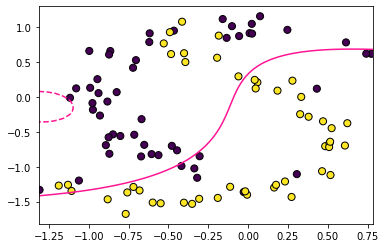

In [272]:
func('gaussian',10)

3. **Repeat step 1.4 using the number of iterations**, and comment on differences/similarities to KRLS (previous exercise).

Flip Value : 10


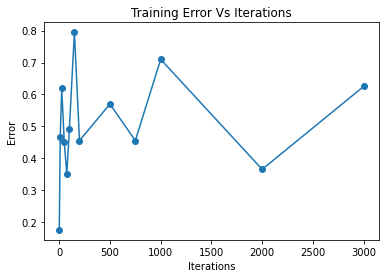

In [275]:
n_iter = [1, 10, 25, 50, 75, 100, 150, 200, 500, 750, 1000, 2000, 3000]
def plot_error_ear(flip):
    """ 
        flip: takes in the flip percentage
    """
    trainin_error = []
    print('Flip Value :',flip)
    for i in n_iter:
        Xtrc, Ytrc, Xtec, Ytec = two_moons(pflip=flip)
        cc=  train_kls_early_stop(Xtr, Ytr, t=i, kernel= 'gaussian', kernel_args=0.5)
        yc =  linear_predict(cb, Xtrc,Xtec, kernel='gaussian', kernel_args=0.5)
        trainin_error.append(c_err(Ytec,np.sign(yc)))    
    plt.scatter(n_iter,trainin_error)
    plt.plot(n_iter,trainin_error)
    plt.title("Training Error Vs Iterations")
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()
    
plot_error_ear(10)    

In [22]:
#Do todo
#The similarities between the two are that irrespective of the algorithm that has been used the error
#Rate is not constant. When the algorithm is run there are different values that are produced for the error. 
#Take the example of 1000 iterations, at one point it will be 0.2 but later it can be say 0.7. The error rate is 
# not stable.
# The major difference is that the early stopping tends to produce much more accurate results than the earlier method. 

### 3. (bonus) Multi-path KRLS

At the heart of the KRLS algorithm is the following problem:

$$
c = (K + \lambda I_{n\times n})^{-1} y
$$

Solving the problem for a single value of $\lambda$ takes $O(n^3)$ operations if $K$ is of size $n\times n$. In this lab we had to solve the linear system above for several values of $\lambda$.

Do we have to pay $O(n^3)$ for each $\lambda$? Given multiple values for $\lambda$, is there a faster way to solve the problem above once we have solved it for the first value of $\lambda$?
**Hint:** any symmetric matrix $S$ has an eigenvalue decomposition as $U\Lambda U^\top$.

In [1]:
#TODO
